In [1]:
# cd to outer folder
%cd ../

/home/ksridhar/PoE_NeurIps/standard-training


# Train resnet20 with lr=0.1 (saving checkpoints every 5 epochs), if you have not done so already.

In [ ]:
!mkdir checkpoints
!mkdir checkpoints/cifar10_figure_3
!mkdir checkpoints/cifar10_figure_3/resnet-20_0.1
!python -u cifar_plus.py --save-freq 5 -a resnet --lr 0.1 --depth 20 --epochs 164 --schedule 81 122 --gamma 0.1 --wd 1e-4 --checkpoint checkpoints/cifar10_figure_3/resnet-20_0.1 > checkpoints/cifar10_figure_3/resnet-20_0.1/output.txt

# Retreive Lipschitz object saved after training resnet 20 and calculate lipschitz constants

In [2]:
import torch

checkpoint = torch.load('./notebooks-figure-3-and-4/figure_3_lipschitz.pth.tar') # here we need to have location of downloaded figure_3_lipschitz.pth.tar file
Lipschitz = checkpoint
Ms, Ns, Lips_matrix, pvalues_matrix, MNtups, shapes, Lips_vs_shapes, pvalues_vs_shapes = Lipschitz.fit_with_heatmap(option=1)

83230693, 'loc': -0.015198828585526486, 'scale': 0.012394860054563521, 'ks': 0.0718845415159976, 'pVal': 0.3816578686627402}
==> Sampling 200 max_slopes to fit Weibull with 80 / 164 slopes sampled to find each max_slope
All 200 max slopes: [0.0056518987, 0.0010397703, 0.0021761437, 0.00054429343, 0.004286367, 0.0022561266, 0.002616504, 0.0020012644, 0.004595918, 0.0028008113, 0.006156877, 0.001607698, 0.00283323, 0.0010730282, 0.005267425, 0.0014587835, 0.0037080026, 0.0034116013, 0.0070262826, 0.00064272835, 0.0011966281, 0.0054012327, 0.0034485052, 0.0057784976, 0.000754266, 0.003365038, 0.0019577956, 0.0026556896, 0.0010733949, 0.0016810813, 0.002615664, 0.00027116615, 0.002584495, 0.0015198338, 0.0060059964, 0.003430417, 0.005769941, 0.0026477224, 0.0060716686, 0.005132065, 0.0034926194, 0.0007166801, 0.0020195555, 0.0017557146, 0.0026084299, 0.00024144158, 0.00713027, 0.0054051415, 0.0011516161, 0.0022292982, 0.002510864, 0.0025987057, 0.002626601, 0.0020779283, 0.002061694, 0.004

# Plot heatmap of (M,N) vs shape_0's

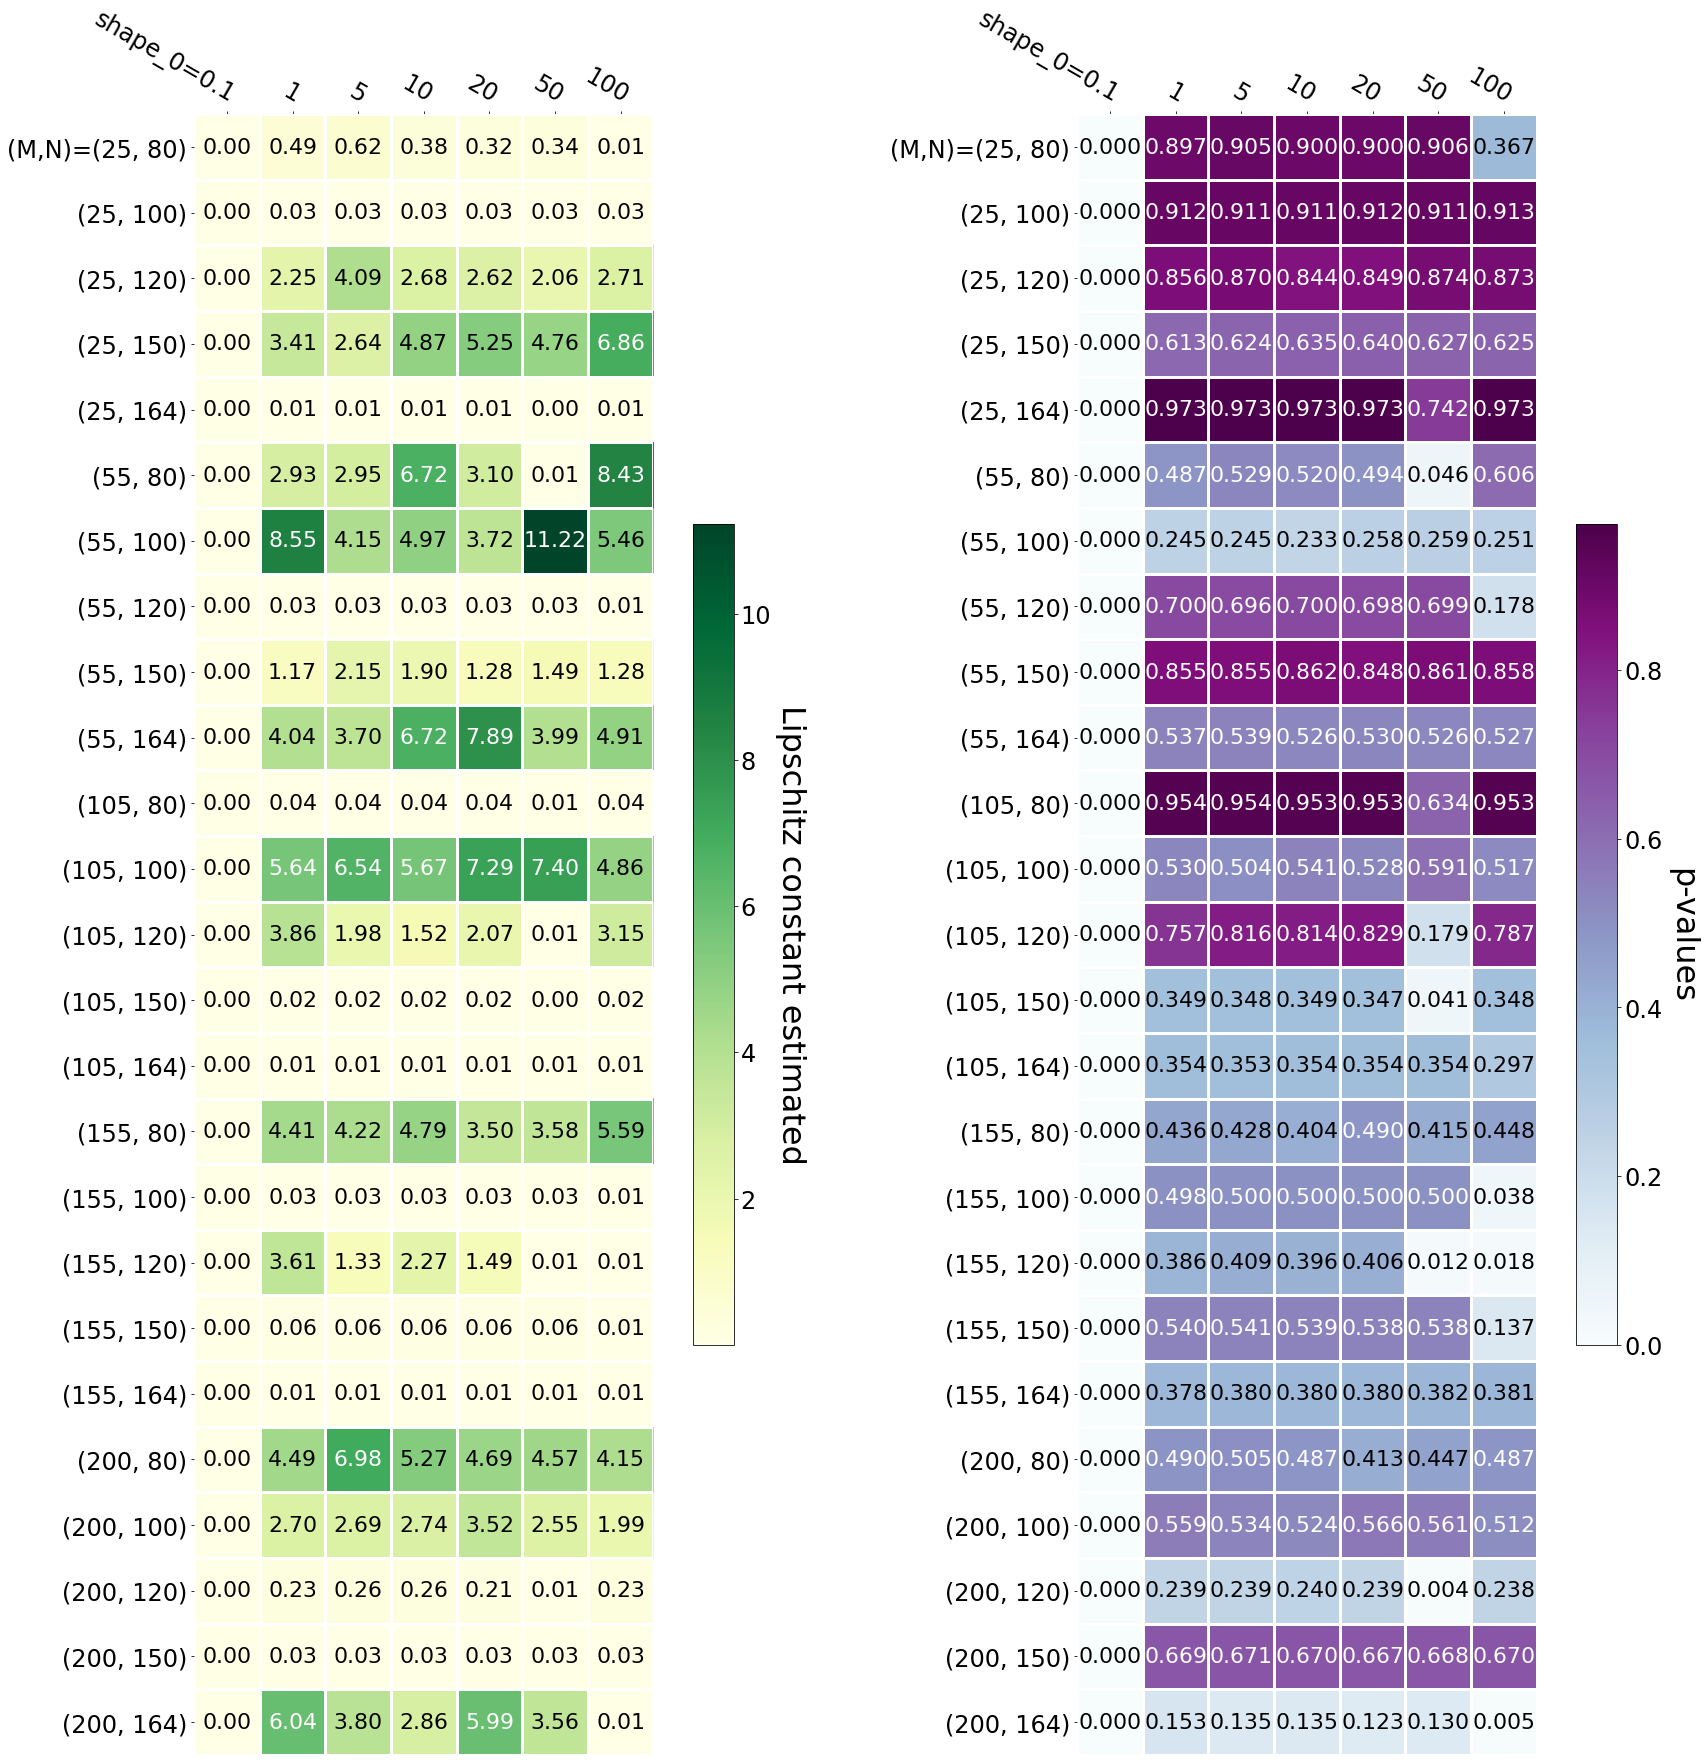

In [3]:
%load_ext autoreload
%autoreload 2
def addto(arr, i, str1):
    arr[i] = str1+str(arr[i])
addto(Ms, 0, 'M=')
addto(Ns, 0, 'N=')
addto(MNtups, 0, '(M,N)=')
addto(shapes, 0, 'shape_0=')

from utils.heatmap_utils import heatmap, annotate_heatmap
import matplotlib.pyplot as plt 

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(25,25))

im, cbar = heatmap(Lips_vs_shapes, MNtups, shapes, ax=ax,cmap="YlGn", cbarlabel="Lipschitz constant estimated", fontsize_no=32)
texts = annotate_heatmap(im, valfmt="{x:.2f}", fontsize_no=22)

im, cbar = heatmap(pvalues_vs_shapes, MNtups, shapes, ax=ax2,cmap='BuPu', cbarlabel="p-values", fontsize_no=32)
texts = annotate_heatmap(im, valfmt="{x:.3f}", fontsize_no=22)

fig.tight_layout()
plt.show()

# Plot heatmap of M vs N for Lispchitz constant estimated and corresponding max pvalues

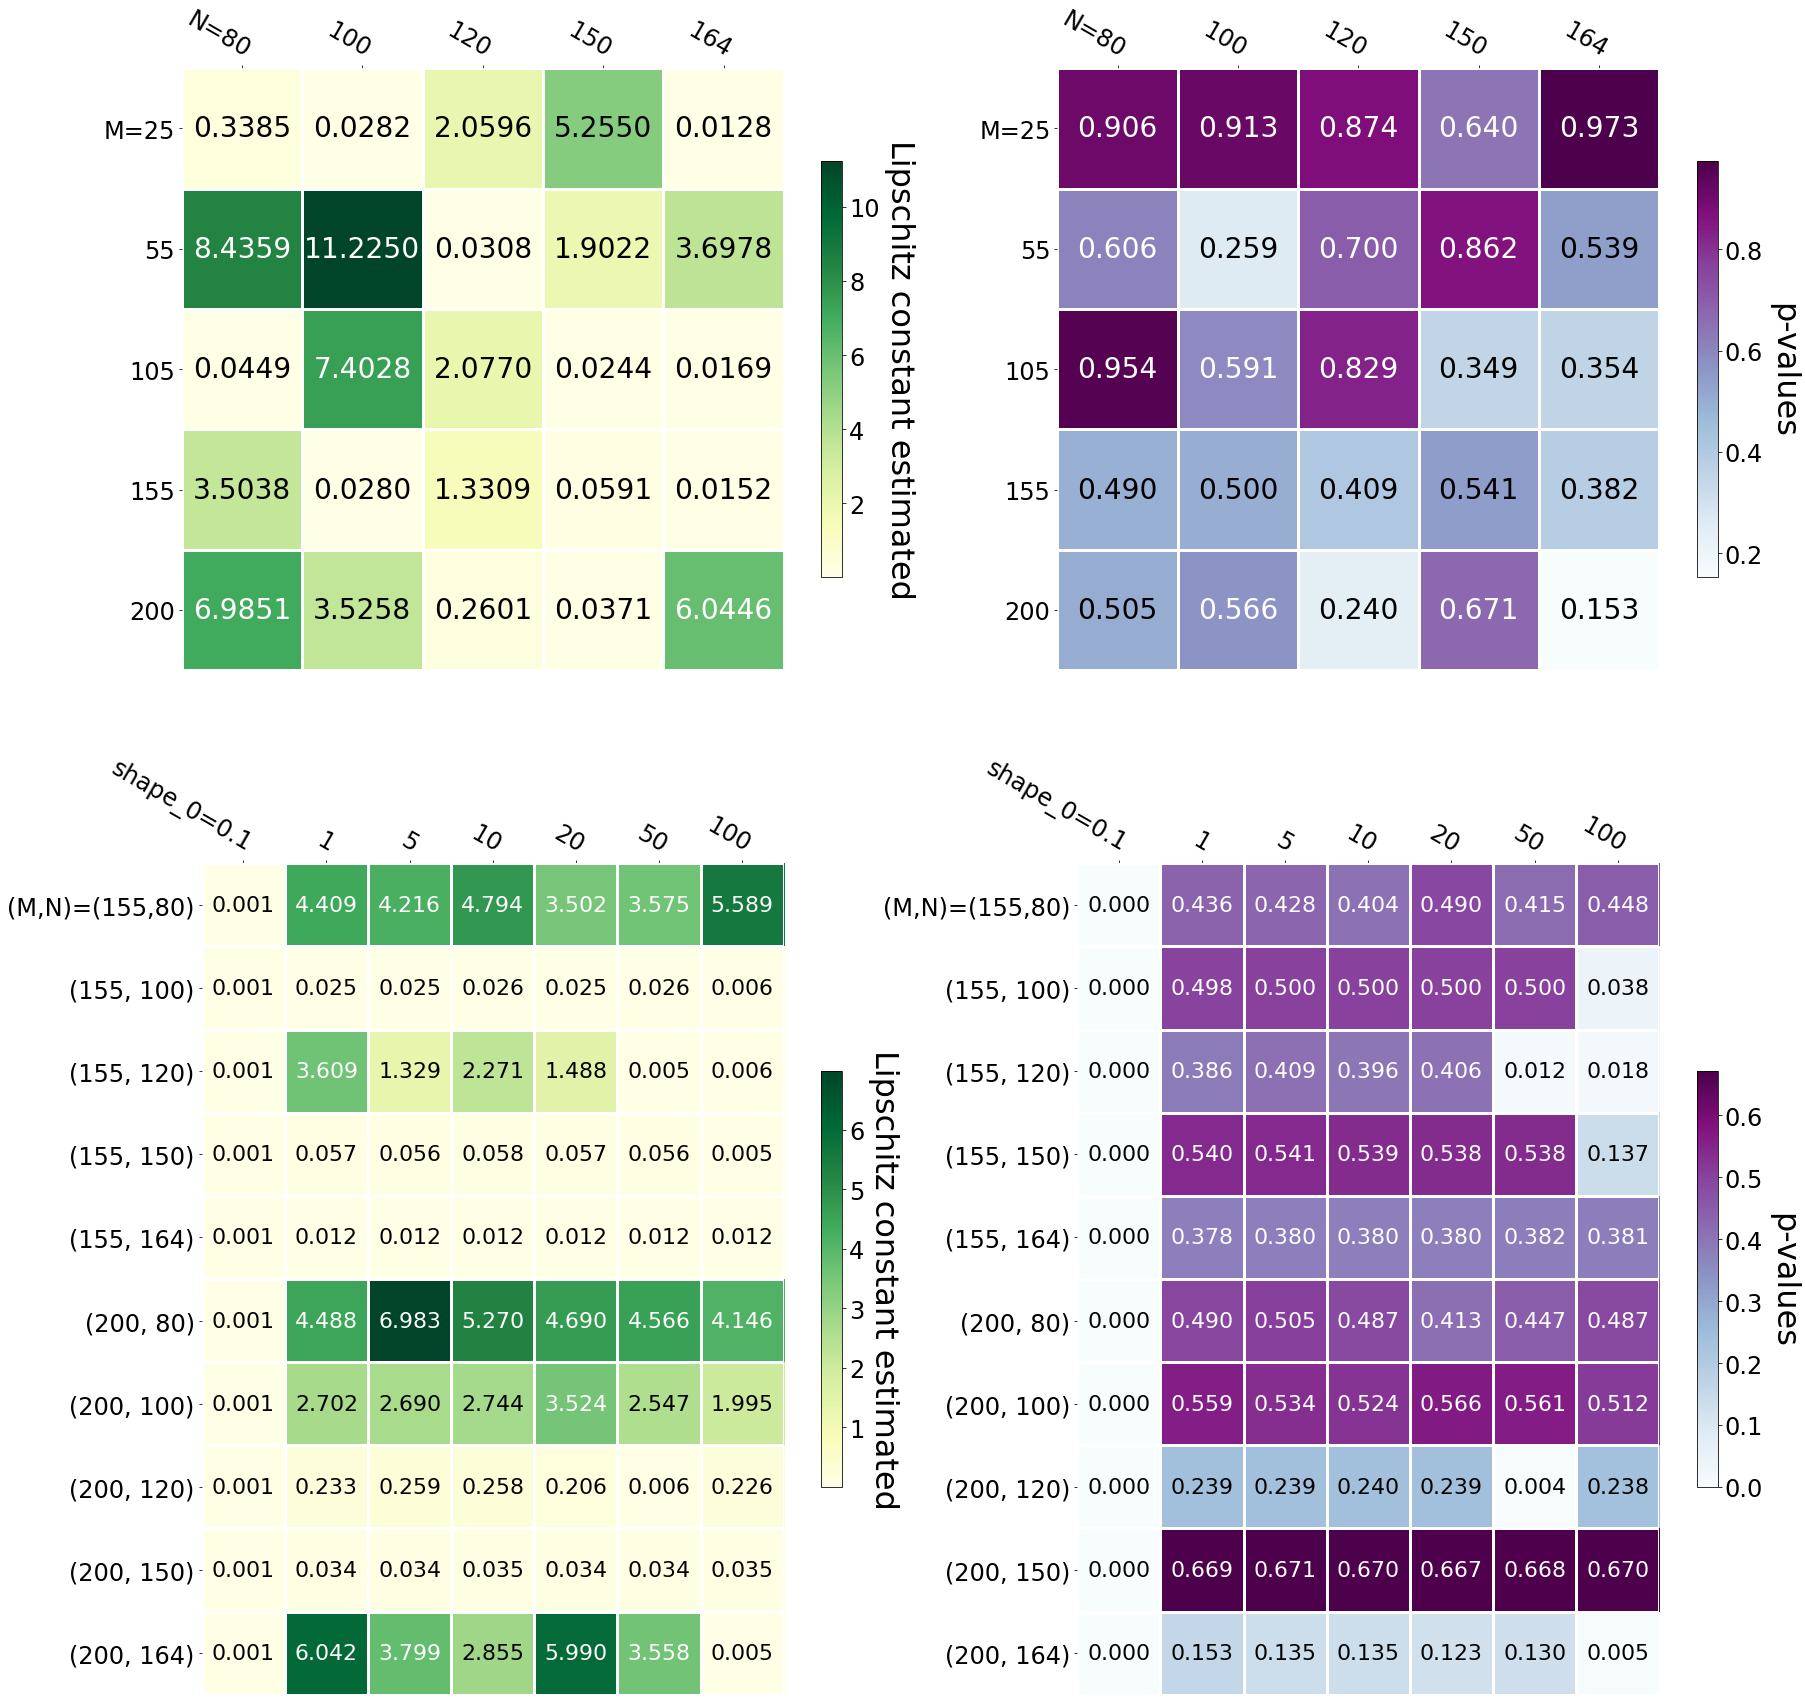

In [4]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25,25))

im, cbar = heatmap(Lips_matrix, Ms, Ns, ax=ax,cmap="YlGn", cbarlabel="Lipschitz constant estimated", fontsize_no=32)
texts = annotate_heatmap(im, valfmt="{x:.4f}", fontsize_no=28)

im, cbar = heatmap(pvalues_matrix, Ms, Ns, ax=ax2,cmap='BuPu', cbarlabel="p-values", fontsize_no=32)
texts = annotate_heatmap(im, valfmt="{x:.3f}", fontsize_no=28)

MNtups[15] = '(M,N)=(155,80)'
im, cbar = heatmap(Lips_vs_shapes[15:], MNtups[15:], shapes, ax=ax3,cmap="YlGn", cbarlabel="Lipschitz constant estimated", fontsize_no=32)
texts = annotate_heatmap(im, valfmt="{x:.3f}", fontsize_no=22)

im, cbar = heatmap(pvalues_vs_shapes[15:], MNtups[15:], shapes, ax=ax4,cmap='BuPu', cbarlabel="p-values", fontsize_no=32)
texts = annotate_heatmap(im, valfmt="{x:.3f}", fontsize_no=22)

fig.tight_layout()
plt.show()


# Now, using L = 3.5258, train a model for learning rate starting at 2/L=0.5672 and 1/L=0.2836 (save checkpoints every 5 epochs)

In [ ]:
!mkdir checkpoints/cifar10_figure_3/resnet-20_0.2836
!python -u cifar_plus.py --save-freq 5 -a resnet --lr 0.2836 --depth 20 --epochs 164 --schedule 81 122 --gamma 0.1 --wd 1e-4 --checkpoint checkpoints/cifar10_figure_3/resnet-20_0.2836  > checkpoints/cifar10_figure_3/resnet-20_0.2836/output.txt

!mkdir checkpoints/cifar10_figure_3/resnet-20_0.5672
!python -u cifar_plus.py --save-freq 5 -a resnet --lr 0.5672 --depth 20 --epochs 164 --schedule 81 122 --gamma 0.1 --wd 1e-4 --checkpoint checkpoints/cifar10_figure_3/resnet-20_0.5672  > checkpoints/cifar10_figure_3/resnet-20_0.5672/output.txt

# Then find adversarial accuracy of each checkpoint of each of lr=0.1, 0.2836, 0.5672 models

In [ ]:
!mkdir PGD 
!mkdir PGD/cifar10_figure_3
import os
import numpy as np
epoch_numbers = list(np.arange(5,164,5)) + [164] 
for i, LR in enumerate([0.1, 0.2836, 0.5672]):
    for j, epoch in enumerate(epoch_numbers):
        GPU_ID_ = int(j%2)
        cmd = 'python cifar_adv.py -a resnet --depth 20 --resume checkpoints/cifar10_figure_3/resnet-20{}/checkpoint{}.pth.tar --adv_folder PGD/cifar10_figure_3/resnet-20{} --gpu-id {}'.format('_{}'.format(LR), '_ep{}'.format(epoch), '_ep{}_{}'.format(epoch, LR), GPU_ID_)
        print('running: ', cmd)
        os.system(cmd)

# Finally, plot val acc and PGD acc (Careful about loc_checkpoint and loc_PGD below)

Clean: basline 91.290001 | 2/L 92.18 | 1/L 91.57
PGD: basline 18.24 | 2/L 19.85 | 1/L 21.299999


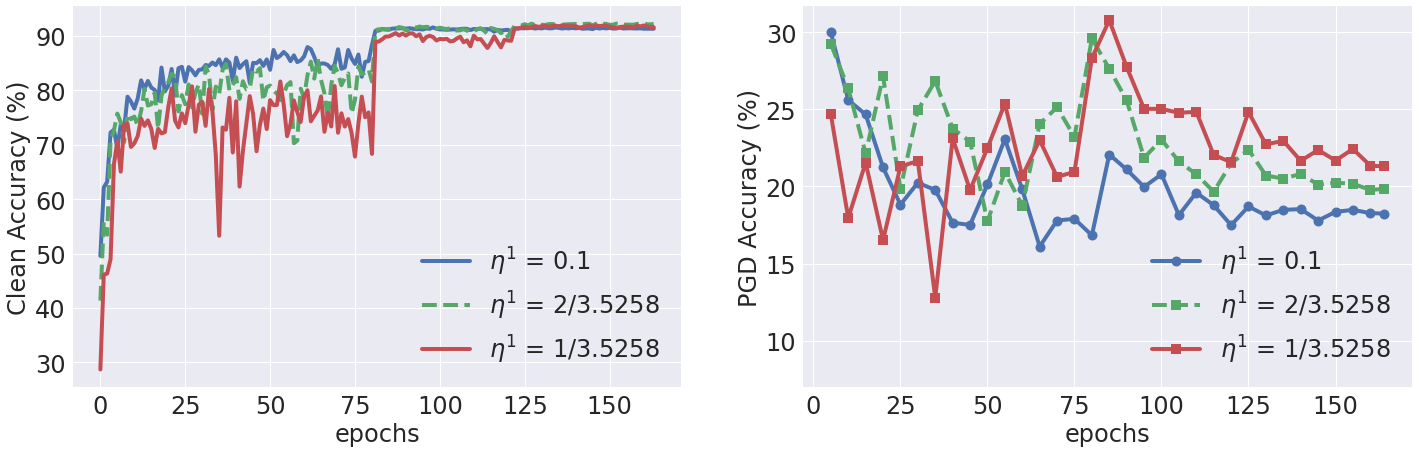

In [3]:
from utils.figure_3_plotter import make_figure_3
loc_checkpoint = 'checkpoints/cifar10_figure_3' # at this location, we need to have '/resnet-20_ep{}_{}/log.txt'.format(EPOCH, LR) folders
loc_PGD = 'PGD/cifar10_figure_3' # at this location, we need to have '/resnet-20_{}/log.txt'.format(LR) folders
make_figure_3([ 3.5258], loc_checkpoint, loc_PGD, option=1) 